In [1]:
import pandas as pd
import numpy as np
import sys, os
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
attributes = ['air_temperature','clearsky_dhi','clearsky_dni','clearsky_ghi','cloud_type','coordinates','dew_point','dhi','dni','fill_flag'
 ,'ghi','meta','relative_humidity','solar_zenith_angle','surface_albedo','surface_pressure','time_index',
 'total_precipitable_water','wind_direction','wind_speed']
attributes = ','.join(attributes)

In [3]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
lat, lon, year = 36.210, -120.085, 2010
# You must request an NSRDB api key from the link above
api_key = 'VvROkeZZCwGSD5nJphV3QNsfDUEplzgwzPSw0Kj1'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'relative_humidity,dew_point,surface_albedo,total_precipitable_water,surface_pressure,ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,relative_humidity,clearsky_ghi,clearsky_dni,clearsky_dhi,cloud_type'

# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Tamuz+Hod'
# Your reason for using the NSRDB.
reason_for_use = 'class+project'
# Your affiliation
your_affiliation = 'UCSD'
# Your email address
your_email = 'test@ucsd.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'true'

# Declare url string
url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [4]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,105434,-,-,-,36.21,-120.1,-8,102,-8,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,v3.0.1


In [5]:
# Return all but first 2 lines of csv to get data:
df_wether_2010 = pd.read_csv(url, skiprows=2)

# Set the time index in the pandas dataframe:
df_wether_2010 = df_wether_2010.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))



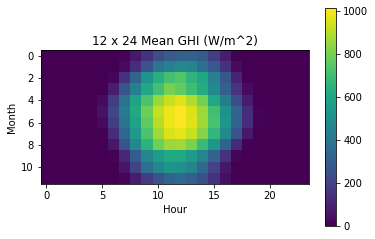

In [6]:
df = pd.DataFrame({'ghi': df_wether_2010['GHI']}, index=df_wether_2010.index)
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour

agg = df.groupby(["month","hour"]).mean()
agg = agg.reset_index().pivot(index="month",columns="hour",values="ghi")

plt.imshow(agg)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("12 x 24 Mean GHI (W/m^2)")
plt.colorbar()

In [7]:
df_weather = df_wether_2010

In [8]:
year = 2010

In [9]:
for i in range(6):
    year = str(int(year) + 1)
    url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
    df_temp = pd.read_csv(url, skiprows=2)
    df_temp = df_temp.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    df_weather = df_weather.append(df_temp)


In [10]:
df_weather.head()

,Year,Month,Day,Hour,Minute,Relative Humidity,Dew Point,Surface Albedo,Precipitable Water,Pressure,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Clearsky GHI,Clearsky DNI,Clearsky DHI,Cloud Type
2010-01-01 00:00:00,2010,1,1,0,0,71.47,3,0.148,1.683,1010.0,0,0,0,0.7,9,166.76,0,0,0,7
2010-01-01 00:30:00,2010,1,1,0,30,71.46,3,0.148,1.698,1010.0,0,0,0,0.6,9,165.63,0,0,0,7
2010-01-01 01:00:00,2010,1,1,1,0,71.20,3,0.148,1.713,1010.0,0,0,0,0.5,9,162.05,0,0,0,6
2010-01-01 01:30:00,2010,1,1,1,30,71.18,3,0.148,1.726,1010.0,0,0,0,0.5,9,157.17,0,0,0,8
2010-01-01 02:00:00,2010,1,1,2,0,70.73,3,0.148,1.739,1010.0,0,0,0,0.5,9,151.67,0,0,0,8


In [11]:
solar_cleaned = pd.read_pickle("./solar.pkl")
training_data = solar_cleaned.loc[solar_cleaned['ID'] == 'A-1611']
training_data = training_data.join(df_weather)
training_data_cleaned = training_data.dropna(thresh=5)
training_data_cleaned.to_pickle("./training_data.pkl")